Details:
Gaya Zaltzman 209494442
Ofri Zadok 208668269

In [49]:
import pandas as pd
df = pd.read_csv("spam_ham_dataset.csv")
df = df[['text', 'label_num']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


Applying the tokens in our df:

In [50]:
from nltk import word_tokenize

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(lowercase=False,
preprocessor=lambda x: x,tokenizer=lambda x: x)

In [52]:
words = df['tokens'].tolist()

In [53]:
vector.fit(words)
vector.get_feature_names()

C:\Users\97250\anaconda3\envs\AI NLP\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\97250\anaconda3\envs\AI NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['\x01',
 '\x05',
 '\x07',
 '\x0f',
 '\x11',
 '\x12',
 '\x13',
 '\x14',
 '\x16',
 '\x1b',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '00',
 '000',
 '0000',
 '000000',
 '000000000002858',
 '000000000049773',
 '000080',
 '000099',
 '0001',
 '00018',
 '00020608',
 '0004',
 '0005',
 '0008',
 '001',
 '0010',
 '001001',
 '0012',
 '001452',
 '002',
 '0022',
 '00221',
 '0025',
 '0027',
 '0028',
 '0029',
 '00298',
 '003',
 '0030',
 '003002',
 '0031',
 '0033',
 '0038',
 '004',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0049',
 '005',
 '00501723',
 '0051',
 '00534580',
 '006',
 '006600',
 '0067',
 '007',
 '0071',
 '0074',
 '008',
 '0080',
 '0085201238',
 '009',
 '0090',
 '01',
 '010',
 '0100',
 '0101',
 '011',
 '0117',
 '012',
 '012603',
 '013',
 '0130',
 '014',
 '01405',
 '01408304990',
 '01474',
 '015',
 '016',
 '017',
 '0170',
 '01778',
 '0182',
 '0184',
 '019',
 '019017',
 '01915',
 '02',
 '020',
 '0200',
 '02010207',
 '021',

Build matrix:

In [54]:
vector.transform(words)
vector.fit_transform(words)

<5171x50524 sparse matrix of type '<class 'numpy.int64'>'
	with 518169 stored elements in Compressed Sparse Row format>

In [55]:
df_ham = df[df['label_num'] == 0]
df_spam = df[df['label_num'] == 1]

In [56]:
def get_matrix(text_df_input, model_input):
    matrix = model.fit_transform(text_df_input).toarray()
    return pd.DataFrame(data=matrix, columns=model_input.get_feature_names())

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop('label_num', axis=1)
y = df['label_num']
train, test = train_test_split(df, test_size=0.2, random_state=320)

Showing the features sounter:

In [58]:
vocabList = []
for list in df['tokens']:
    vocabList += list
wordsSet = set(vocabList)

count_vectorizer = CountVectorizer(vocabulary=wordsSet, lowercase=False)
print(count_vectorizer.get_feature_names_out())

X_train = count_vectorizer.fit_transform(train['text'])
df_bow_train = pd.DataFrame(X_train.toarray(), columns=count_vectorizer.get_feature_names_out())
print(df_bow_train.head())
print(f'train with {X_train.shape[0]} records with {X_train.shape[1]} features')

X_test = count_vectorizer.fit_transform(test['text'])
df_bow_test = pd.DataFrame(X_test.toarray(), columns=count_vectorizer.get_feature_names_out())
print(df_bow_test.head())
print(f'test with {X_test.shape[0]} records with {X_test.shape[1]} features')

y_train = train['label_num']
y_test = test['label_num']

['\x01' '\x05' '\x07' ... '|' '}' '~']
                       ...  zzezrjok  zzn  zzo  zzocb  zzso  zzsyt  \
0  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
1  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
2  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
3  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
4  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   

   {  |  }  ~  
0  0  0  0  0  
1  0  0  0  0  
2  0  0  0  0  
3  0  0  0  0  
4  0  0  0  0  

[5 rows x 50524 columns]
train with 4136 records with 50524 features
                       ...  zzezrjok  zzn  zzo  zzocb  zzso  zzsyt  \
0  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
1  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0      0   
2  0  0  0  0  0  0  0  0  0  0  ...         0    0    0      0     0     

Logistic Regression Classifier:

In [59]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(random_state=1234)
clf.fit(X_train,y_train)

y_pred_test =clf.predict(X_test)

print("Test prediction:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision:", metrics.precision_score(y_test, y_pred_test))
print("Recall:", metrics.recall_score(y_test, y_pred_test))
print("F1:", metrics.f1_score(y_test, y_pred_test))

Test prediction:
Accuracy: 0.9874396135265701
Precision: 0.9717868338557993
Recall: 0.9872611464968153
F1: 0.9794628751974723


C:\Users\97250\anaconda3\envs\AI NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Classifier:

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import math

k= int(math.sqrt(X_train.shape[0])/2)
if k%2 ==0:
    k+=1

clf= KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train,y_train)
y_pred_test =clf.predict(X_test)

print("Test prediction: ")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test,average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test,average='macro'))

Test prediction: 
Accuracy: 0.8
Precision: 0.8332648649480333
Recall: 0.8151011069197946


Decision Tree Classifier:

C:\Users\97250\anaconda3\envs\AI NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1500x2000 with 0 Axes>

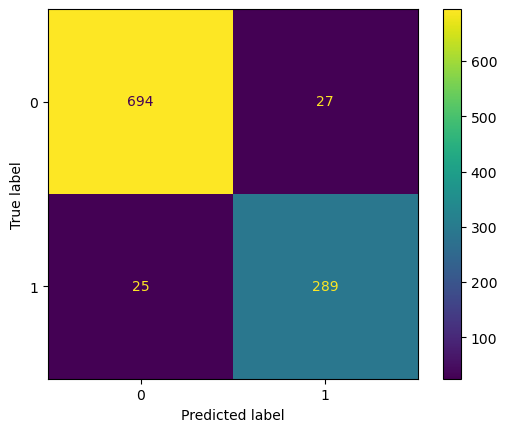

Test prediction:
Accuracy: 0.9497584541062802
Precision: 0.9145569620253164
recall: 0.9203821656050956
F1: 0.9174603174603175


In [61]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train, y_train)
plt.figure(figsize=(15, 20), dpi=100)

y_pred_test = model.predict(X_test)
cm_test = pd.crosstab(y_test, y_pred_test, colnames=['pred'], margins=True)
plot_confusion_matrix(model, X_test, y_test)
plt.show()

print("Test prediction:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision:", metrics.precision_score(y_test, y_pred_test))
print("recall:", metrics.recall_score(y_test, y_pred_test))
print("F1:", metrics.f1_score(y_test, y_pred_test))

SVM Classifier:

In [62]:
from sklearn import svm
from sklearn import metrics


svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

y_pred_test=svm_model.predict(X_test)

print("Test prediction:")
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1:",metrics.f1_score(y_test,y_pred_test))

Test prediction:
Accuracy: 0.9584541062801932
Precision: 0.9221183800623053
Recall: 0.9426751592356688
F1: 0.9322834645669291


Creating a table of our prediction scores:

In [63]:
from tabulate import tabulate

data = [["Logistic Regression", "Accuracy: 0.987, Precision: 0.971, recall: 0.987, F1: 0.979"],
        ["KNN", "Accuracy: 0.8,Precision: 0.833,recall: 0.815"],
        ["Decision Tree", "Accuracy: 0.949, Precision: 0.914,recall: 0.920, F1: 0.917"],
        ["SVM", "Accuracy: 0.958, Precision: 0.942 ,recall: 0.922 , F1: 0.932"]]

col_names = ["model_name", "scores"]

print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))

+----+---------------------+--------------------------------------------------------------+
|    | model_name          | scores                                                       |
+====+=====================+==============================================================+
|  0 | Logistic Regression | Accuracy: 0.987, Precision: 0.971, recall: 0.987, F1: 0.979  |
+----+---------------------+--------------------------------------------------------------+
|  1 | KNN                 | Accuracy: 0.8,Precision: 0.833,recall: 0.815                 |
+----+---------------------+--------------------------------------------------------------+
|  2 | Decision Tree       | Accuracy: 0.949, Precision: 0.914,recall: 0.920, F1: 0.917   |
+----+---------------------+--------------------------------------------------------------+
|  3 | SVM                 | Accuracy: 0.958, Precision: 0.942 ,recall: 0.922 , F1: 0.932 |
+----+---------------------+----------------------------------------------------

The best scores are in the Logistic Regression model. We can refer that the accuracy, recall, precision and F1 are the highest from all the above, which means that this model is the most accurate. This result shows us that Logistic Regression model predicts spam emails the best.